In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('D:\Experience-Salary.csv')
data['exp(in months)'] = data['exp(in months)'].astype(int)
data['salary(in thousands)'] = data['salary(in thousands)'].round(2)
data

,exp(in months),salary(in thousands)
0,18,16.52
1,17,11.67
2,26,23.17
3,19,20.88
4,27,23.17
...,...,...
995,22,24.67
996,32,24.16
997,17,19.90
998,25,21.97


In [3]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
X_train_standardized = (X_train - np.mean(X_train)) / np.std(X_train)

In [5]:
X_train_with_bias = np.c_[np.ones_like(X_train_standardized), X_train_standardized]

In [6]:
X_train_with_bias

array([[ 1.        ,  0.6251671 ],
       [ 1.        ,  0.16643407],
       [ 1.        , -2.35659754],
       ...,
       [ 1.        ,  1.8866829 ],
       [ 1.        ,  0.16643407],
       [ 1.        , -1.32444825]])

In [7]:
m = 0
c = 0
# Hyperparameters
learning_rate = 0.01
epochs = 1500

n = float(len(X_train_standardized))

#Gradient Descent
costs = []
slopes = []

for i in range(epochs):
    Y_pred = np.dot(X_train_with_bias, np.array([c, m]))
    D_m = (-2/n) * np.dot(X_train_standardized, (Y_train - Y_pred))
    D_c = (-2/n) * np.sum(Y_train - Y_pred)
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c
    
    # Compute and store the cost function value and slope for visualization
    cost = np.sum((Y_pred - Y_train)**2) / (2 * n)
    costs.append(cost)
    slopes.append(m)

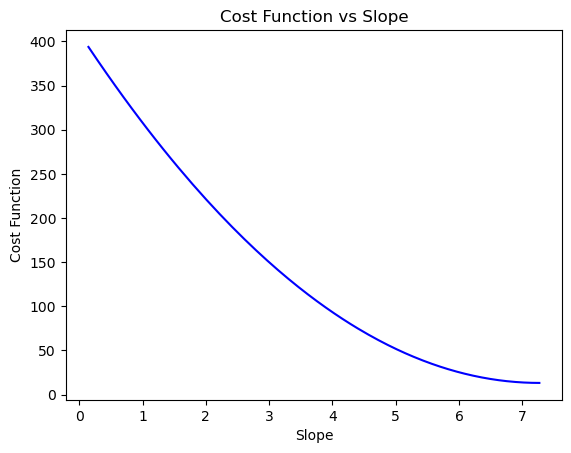

In [8]:
# Plotting the Cost Function vs Slope
plt.plot(slopes, costs, color='blue')
plt.xlabel('Slope')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Slope')
plt.show()

Text(0.5, 1.0, 'Fitted Line')

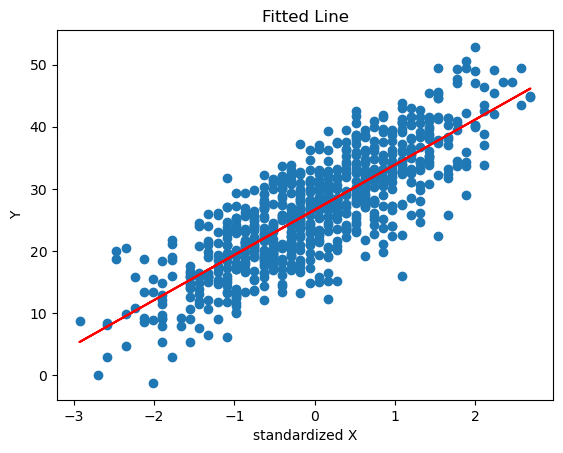

In [9]:
plt.scatter(X_train_standardized, Y_train)
plt.plot(X_train_standardized, Y_pred, color='red')
plt.xlabel('standardized X')
plt.ylabel('Y')
plt.title('Fitted Line')


In [10]:
final_cost = costs[-1]

print("Slope: Value", m)
print("Intercept: Value", c)
print("Final Cost Function:", final_cost)

Slope: Value 7.269733014254191
Intercept: Value 26.61163749999816
Final Cost Function: 13.274732422524593


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
Y_train_pred = np.dot(X_train_with_bias, np.array([c, m]))

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_train, Y_train_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared (R2) Score
r2 = r2_score(Y_train, Y_train_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 26.549464845049187
R-squared (R2) Score: 0.6656174795693458
